# Import Libraries

In [ ]:
#import libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the dataset & assign labels

In [ ]:
#loading the dataset and assigning the respective label for each image
#since the image is divided into stroke or normal, each image has a corresponding label of stroke or normal
path = '/content/drive/MyDrive/Brain_Data_Organised/*'
images = []
labels = []
i = 0
for folder in glob.glob(path):
    for filename in os.listdir(os.path.join(path,folder)):
        img = cv2.imread(os.path.join(path,folder,filename))
        try:
          img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)
          print(img.shape)
        except:
          break
        if img is not None:
            images.append(img)
            labels.append(folder.split('/')[-1])
        else:
            i = 0
            break

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [ ]:
labels[0:10] #showing the labels of the first 10 labels 

['Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke',
 'Stroke']

# Convert Labels into Arrays

In [ ]:
images = np.array(images) #convert the images and labels into arrays for easier computations
labels_a = np.array(labels)
print(len(images))
print(len(labels))

1949
1949


In [ ]:
#now we encode the labels as 0's or 1's, 0 will be assigned to Normal, and 1 will be assigned to stroke.
labelencoder = LabelEncoder()
labels_a = labelencoder.fit_transform(labels_a)

# Visualize Normal & Stroke Images

In [ ]:
multipleImagesNormal = glob.glob('/content/drive/MyDrive/Brain_Data_Organised/Normal/*')
multipleImagesStroke = glob.glob('/content/drive/MyDrive/Brain_Data_Organised/Stroke/*')
def plotImages2():
    r = random.sample(multipleImagesNormal, 4)
    s = random.sample(multipleImagesStroke, 4)
    plt.figure(figsize=(20,20))
    plt.subplot(421)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(422)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(423)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(424)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(425)
    plt.imshow(cv2.imread(s[0])); plt.axis('off')
    plt.subplot(426)
    plt.imshow(cv2.imread(s[1])); plt.axis('off')
    plt.subplot(427)
    plt.imshow(cv2.imread(s[2])); plt.axis('off')
    plt.subplot(428)
    plt.imshow(cv2.imread(s[3])); plt.axis('off')

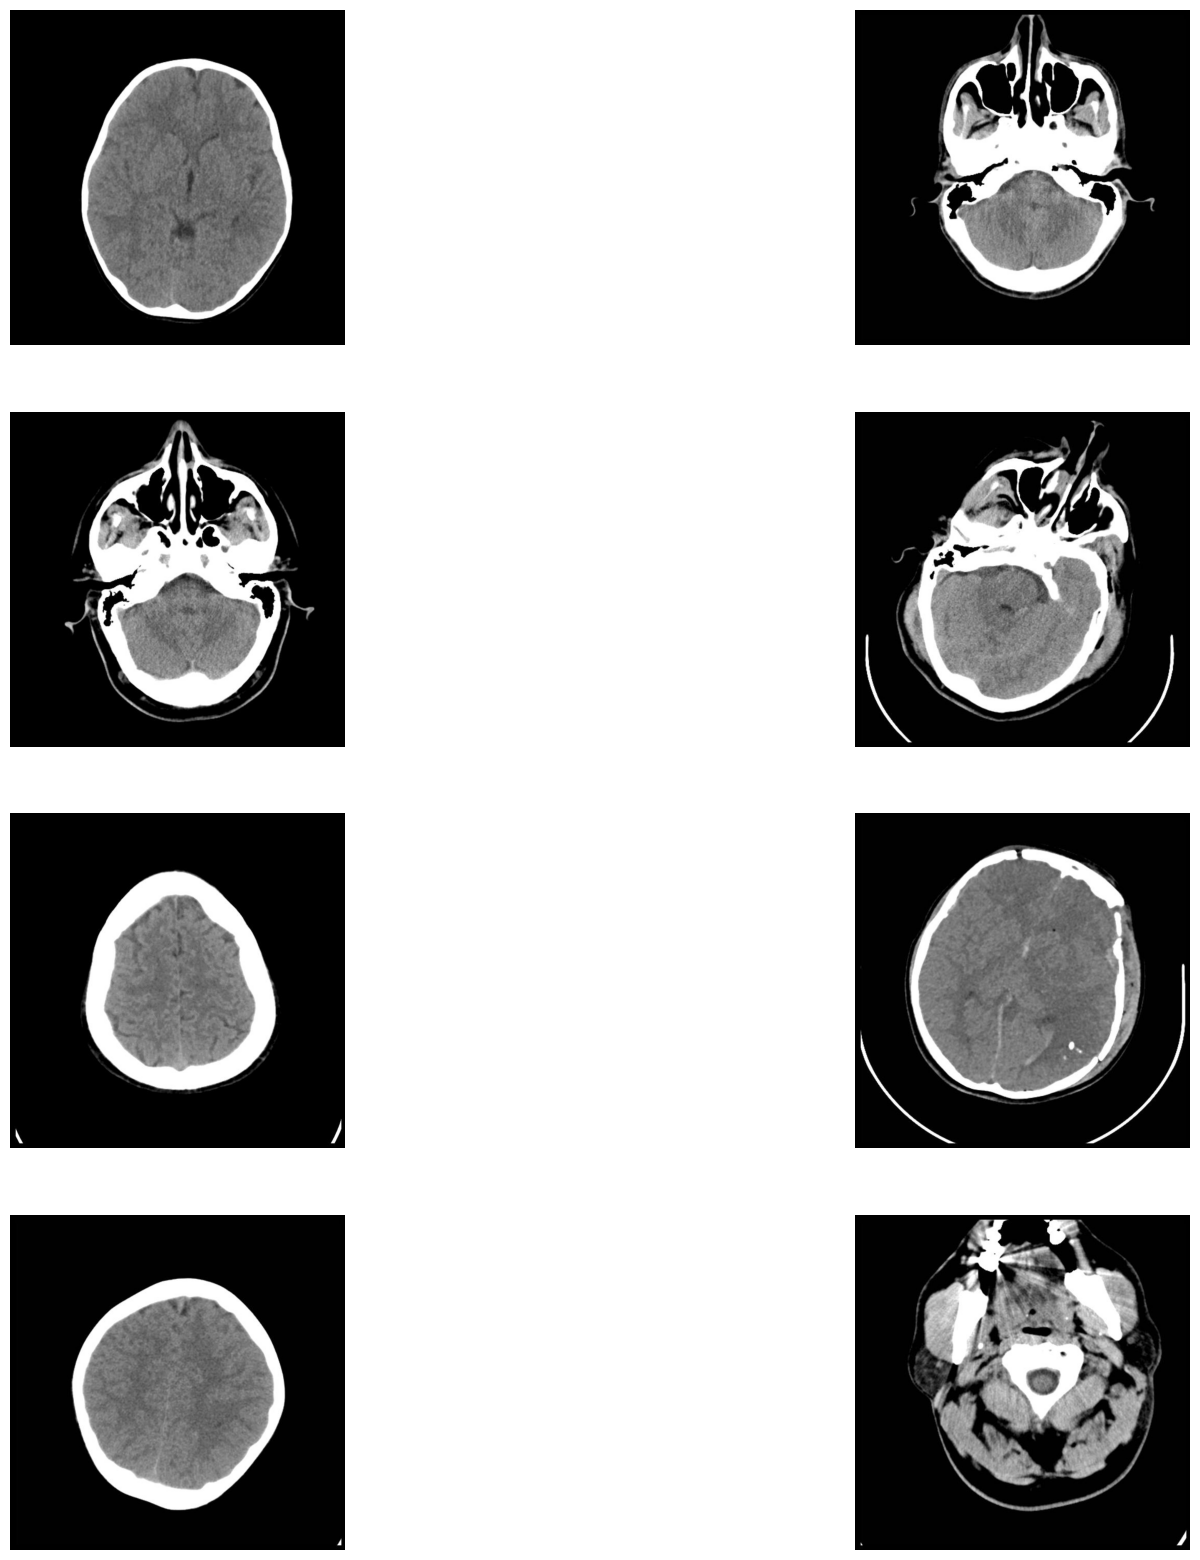

In [ ]:
plotImages2()

# Data splitting

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(images,labels_a, train_size=0.8)

In [ ]:
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Image Generators for sampling

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness


# VGG16 Model

In [ ]:
def create_model(input_shape=(224, 224, 3), inner_size=100, drop_rate=0.1, learning_rate=0.001):
  base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
  base_model.trainable = False ## Not trainable weights


  from tensorflow.keras import layers, models

  flatten_layer = layers.Flatten()
  dense_layer_1 = layers.Dense(50, activation='relu')
  dense_layer_2 = layers.Dense(20, activation='relu')
  prediction_layer = layers.Dense(1, activation='sigmoid')


  model = models.Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      dense_layer_2,
      prediction_layer
  ])
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'],
  )


  return model


# Model Training

In [ ]:
def train_model(model, model_path, X_train, y_train, X_test, y_test, steps_per_epoch=20, epochs=20, callbacks=[]):
  """Trains the model"""
 
  es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

  #epochs
  epochs = 25
  # Batch size
  batch_size = 32

  history = model.fit(train_datagen.flow(X_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                
                      epochs=epochs,
                      callbacks = [es],
                      steps_per_epoch=X_train.shape[0] // batch_size,
                      validation_data= (X_test,y_test),
                      verbose=1)
  return history, model

In [ ]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 50)                1638450   
                                                                 
 dense_4 (Dense)             (None, 20)                1020      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 16,354,179
Trainable params: 1,639,491
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
filepath='/content/drive/MyDrive/Brain_Data_Organised/saved_model1.ckpt'

# Parameter Tuning

In [ ]:
scores = {}

for lr in [0.001, 0.01, 0.1]:
  print(lr)

  model = create_model(learning_rate=lr)
  history, model = train_model(model, model_path=filepath, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

  scores[lr] = history.history

0.001
Epoch 1/25
48/48 [==============================] - 53s 814ms/step - loss: 1.5316 - accuracy: 0.5553 - val_loss: 2.0384 - val_accuracy: 0.6000
Epoch 2/25
48/48 [==============================] - 31s 643ms/step - loss: 0.7926 - accuracy: 0.6379 - val_loss: 0.6857 - val_accuracy: 0.7385
Epoch 3/25
48/48 [==============================] - 33s 685ms/step - loss: 0.7839 - accuracy: 0.6536 - val_loss: 0.6727 - val_accuracy: 0.7744
Epoch 4/25
48/48 [==============================] - 31s 655ms/step - loss: 0.5710 - accuracy: 0.7308 - val_loss: 0.5725 - val_accuracy: 0.7692
Epoch 5/25
48/48 [==============================] - 39s 813ms/step - loss: 0.5597 - accuracy: 0.7407 - val_loss: 0.6866 - val_accuracy: 0.7231
Epoch 6/25
48/48 [==============================] - 34s 701ms/step - loss: 0.5206 - accuracy: 0.7642 - val_loss: 0.6370 - val_accuracy: 0.7538
Epoch 7/25
48/48 [==============================] - 41s 856ms/step - loss: 0.4980 - accuracy: 0.7616 - val_loss: 0.7039 - val_accuracy: 

# Save VGG16 model

In [ ]:
model.save('/content/drive/MyDrive/ModelSaved/VGG16model.h5')

In [ ]:
trial = keras.models.load_model('/content/drive/MyDrive/ModelSaved/VGG16model.h5')

# Model metrics

In [ ]:
score = trial.evaluate(X_valid, y_valid, verbose=0)
print("%s: %.2f%%" % (trial.metrics_names[1], score[1]*100))

accuracy: 80.00%


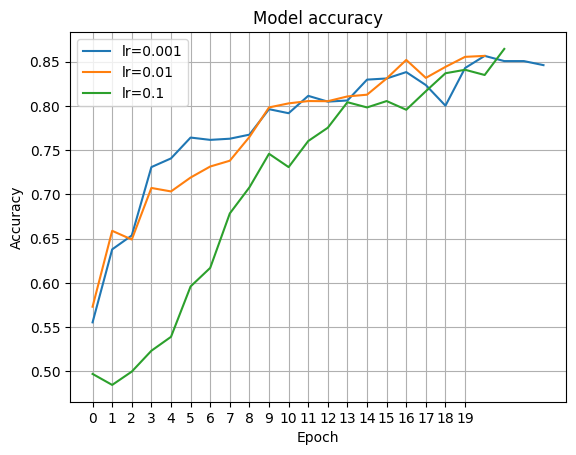

In [ ]:
import matplotlib.pyplot as plt
# Plot training accuracy values
for lr, history in scores.items():
  plt.plot(history['accuracy'], label=('lr=%s' % lr))

plt.xticks(np.arange(20))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()





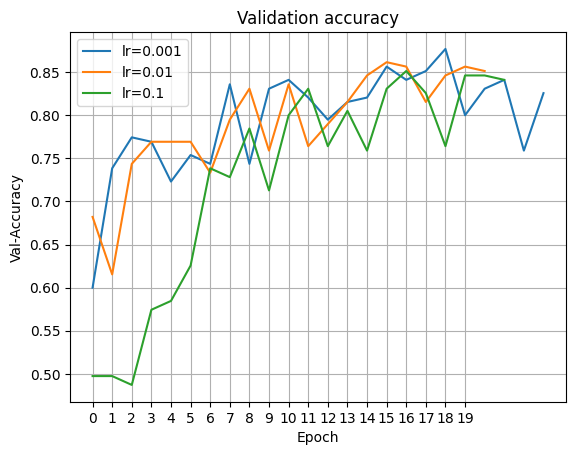

In [ ]:

# Plot validation accuracy values
for lr, history in scores.items():
  plt.plot(history['val_accuracy'], label=('lr=%s' % lr))

plt.xticks(np.arange(20))
plt.title('Validation accuracy')
plt.ylabel('Val-Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

The best learning rate for this model seems to be "Green" that is 0.1

In [ ]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_valid[int(X_valid.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

7/7 [==============================] - 1s 144ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds_test_t, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        98
           1       0.79      0.95      0.86        97

    accuracy                           0.85       195
   macro avg       0.86      0.85      0.85       195
weighted avg       0.87      0.85      0.85       195



In [ ]:
conf = (confusion_matrix(y_test, preds_test_t))

<Axes: >

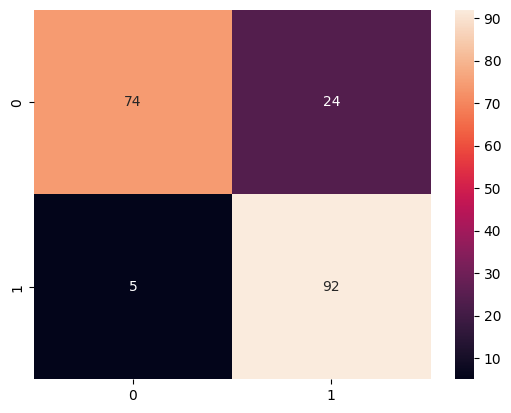

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

# INCEPTION V3


In [ ]:
def create_model(input_shape=(224, 224, 3), inner_size=100, drop_rate=0.1, learning_rate=0.001):
  """Creates the CNN model based on Transfer Learning"""

  base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
  base_model.trainable = False ## Not trainable weights


  from tensorflow.keras import layers, models

  flatten_layer = layers.Flatten()
  dense_layer_1 = layers.Dense(50, activation='relu')
  dense_layer_2 = layers.Dense(20, activation='relu')
  prediction_layer = layers.Dense(1, activation='sigmoid')


  model = models.Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      dense_layer_2,
      prediction_layer
  ])
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'],
  )


  return model

# Model training

In [ ]:
def train_model(model, model_path, X_train, y_train, X_test, y_test, steps_per_epoch=20, epochs=20, callbacks=[]):
  """Trains the model"""
  es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

  #epochs
  epochs = 25
  # Batch size
  batch_size = 32

  history = model.fit(train_datagen.flow(X_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                
                      epochs=epochs,
                      callbacks = [es],
                      steps_per_epoch=X_train.shape[0] // batch_size,
                      validation_data= (X_test,y_test),
                      verbose=1)
  return history, model

In [ ]:
model1 = create_model()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 50)                3686450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,490,275
Trainable params: 3,687,491
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
filepath='/content/drive/MyDrive/Brain_Data_Organised/saved_model.ckpt'

# Hyperparameter tuning

In [ ]:
scores = {}

for lr in [0.001, 0.01, 0.1]:
  print(lr)

  model1 = create_model(learning_rate=lr)
  history, model1 = train_model(model1, model_path=filepath, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

  scores[lr] = history.history

0.001
Epoch 1/25
48/48 [==============================] - 44s 603ms/step - loss: 16.2723 - accuracy: 0.5337 - val_loss: 12.8126 - val_accuracy: 0.4821
Epoch 2/25
48/48 [==============================] - 25s 527ms/step - loss: 5.2003 - accuracy: 0.5029 - val_loss: 5.9967 - val_accuracy: 0.5487
Epoch 3/25
48/48 [==============================] - 25s 528ms/step - loss: 2.9185 - accuracy: 0.5206 - val_loss: 4.1469 - val_accuracy: 0.5538
Epoch 4/25
48/48 [==============================] - 26s 531ms/step - loss: 1.5762 - accuracy: 0.5684 - val_loss: 4.6199 - val_accuracy: 0.5231
Epoch 5/25
48/48 [==============================] - 26s 532ms/step - loss: 1.9807 - accuracy: 0.5652 - val_loss: 5.0257 - val_accuracy: 0.5231
Epoch 6/25
48/48 [==============================] - 25s 528ms/step - loss: 2.1079 - accuracy: 0.5645 - val_loss: 1.6027 - val_accuracy: 0.6205
Epoch 7/25
48/48 [==============================] - 25s 530ms/step - loss: 1.3472 - accuracy: 0.6221 - val_loss: 1.3126 - val_accuracy

# Save Inception V3 model

In [ ]:
model1.save('/content/drive/MyDrive/ModelSaved/InceptionV3model.h5')

In [ ]:
trial1 = keras.models.load_model('/content/drive/MyDrive/ModelSaved/InceptionV3model.h5')

# Model metrics

In [ ]:
score = trial1.evaluate(X_valid, y_valid, verbose=0)
print("%s: %.2f%%" % (trial1.metrics_names[1], score[1]*100))

accuracy: 59.49%


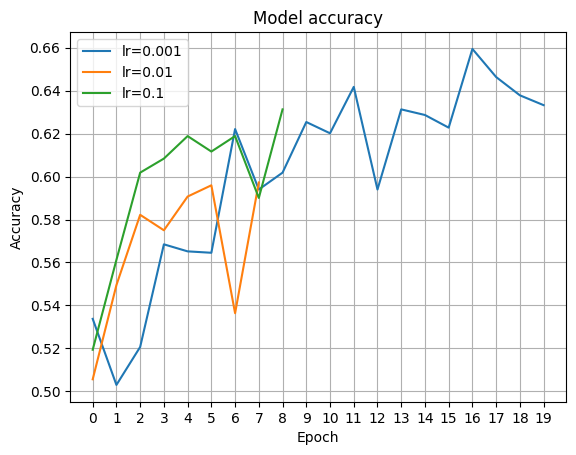

In [ ]:
import matplotlib.pyplot as plt
# Plot training accuracy values
for lr, history in scores.items():
  plt.plot(history['accuracy'], label=('lr=%s' % lr))

plt.xticks(np.arange(20))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()






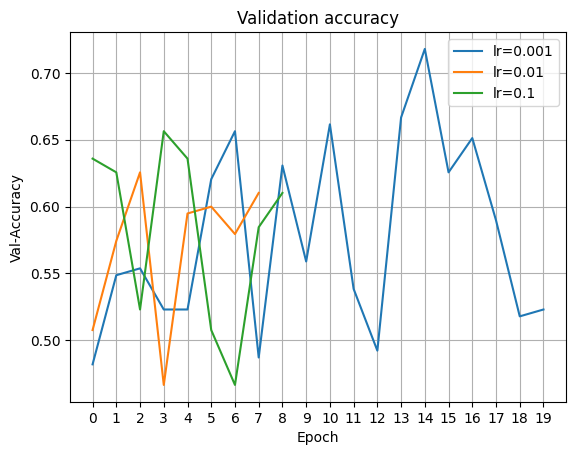

In [ ]:
# Plot validation accuracy values
for lr, history in scores.items():
  plt.plot(history['val_accuracy'], label=('lr=%s' % lr))

plt.xticks(np.arange(20))
plt.title('Validation accuracy')
plt.ylabel('Val-Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

The best learning rate for the model is "Blue" 0.001


In [ ]:
preds_train = model1.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model1.predict(X_valid[int(X_valid.shape[0]*0.9):], verbose=1)
preds_test = model1.predict(X_test, verbose=1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

7/7 [==============================] - 1s 82ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds_test_t, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.76      0.38      0.51        91
           1       0.62      0.89      0.74       104

    accuracy                           0.66       195
   macro avg       0.69      0.64      0.62       195
weighted avg       0.69      0.66      0.63       195



In [ ]:
conf = (confusion_matrix(y_test, preds_test_t))

<Axes: >

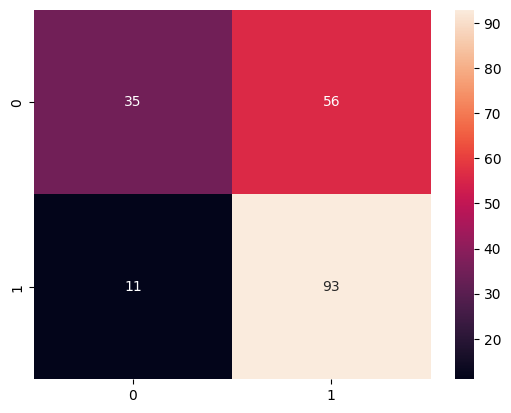

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)